# Mouse Simulator


This agent represents a very simple mouse who maintains a generative bayesian model of its world consisting of 2 normal distributions and a non-linear transformation g(x) = x^2. The mouse's sensations of its world are very simplistic: it only has a single sensor that generates a scalar value representing light intensity.



Compute & plot the posterior of sizes from 0.01 to 5.0.
- animal observed light intensity u=2
- noise of animal sensor (eye neuron) sigma_u = 1
- mean, variance of prior: v_p = 3, sigma_p = 1

<img src="bayesian_net.jpg" width="200"></div>

See [full tutorial here](https://www.sciencedirect.com/science/article/pii/S0022249615000759#bbr000050).


In [6]:
# This Env represents a world in which only one cookie exists at a time.
# An agent looks at the cookie by calling step(), which returns a scalar representing light intensity.
# The light intensity is determinstic function of the cookie size 
class Env:
    def __init__(cookie_size=2)
        self.cookie_size = cookie_size


    # No actions accepted
    # Returns light intensity at this timestep.
    def step(self, action):
        assert not action
        return self.cookie_size, 0, False, {}
    
# The mouse brain has variables to track what it believes.
# These variables fall roughly into two categories:
# First class of beliefs are ones that can be updated quickly
# in response to sensory input, such as the belief that a recently
# viewed cookie was 2cm. These are analogous to the near immediate changes 

# and ones that evolve more slowly over time which in the brain are implemented using
# synaptic plasticity, analogous to the way params are updated via backprop in TensorFlow.
class Mouse:
    def __init__(self, env, steps=1):
        self.sensor_reading = None     # u
        self.sensor_error = None       # epsilon_u
        self.cookie_size_error = None  # epsilon_p
        
        self.cookie_size_prior_mean = None  # v_p
        self.cookie_size_prior
        
        self.env = env
        num_steps = 0
        while num_steps < steps:
            obs, reward, done, _ = self.env.step(None)
            self.update_self(obs)
            num_steps += 1
            
    def update_self(self, obs):
        print(f"mouse received light intensity {obs}")
        self.sensor_reading = obs
        update_sensor_error()
        
    #paper
    def update
        
        

Mouse(Env())
        

mouse sensed 2


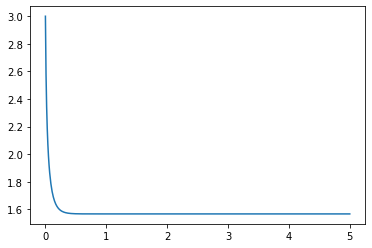

In [1]:
import scipy.stats
import matplotlib.pyplot as plt

# phi is random var from normal distr w/ mean `v_p`, std `sigma_p`
v_p = 3
sigma_p = 1

phi = [v_p]


# u is random var from normal distr w/ mean `observed_u`, std `sigma_u`
observed_u = 2
sigma_u = 1

# 500 iterations, 100 per time step t
start_t = 0
end_t = 5
dt = 0.01

def df_dphi(phi):
    return ((v_p - phi) / sigma_p) + ((observed_u - phi * phi) / sigma_u) * 2 * phi

for i in range(int(end_t / dt)):
    der = df_dphi(phi[i])
    #print(der)
    phi.append(phi[i] + dt * der)

plt.plot([x*dt for x in range(len(phi))], phi)

# Exercise 3

epsilon_p 0
epsilon_u 0
phi 3



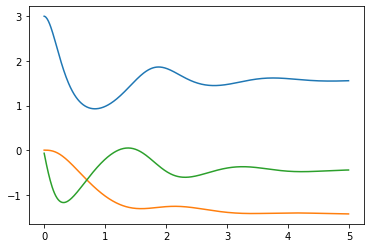

In [52]:
import matplotlib.pyplot as plt

u = 2
v_p = 3
sigma_p = 1
sigma_u = 1

phi = v_p
epsilon_u = 0
epsilon_p = 0
print(f"epsilon_p {epsilon_p}")
print(f"epsilon_u {epsilon_u}")
print(f"phi {phi}")
print()

dt = 0.01

def g(phi): return phi * phi
def g_prime(phi): return 2 * phi

t, phi_array, epsilon_p_array, epsilon_u_array = [], [], [], []
for i in range(500):
    t.append(i * dt)

    # Update vals for this timestep
    #     0         * 2*3          - 1 = -1
    phi = phi + dt * (epsilon_u * g_prime(phi) - epsilon_p)
    #print(f"phi {phi}")

    #             0 - 3   - 1       * 0 = -1
    epsilon_p = epsilon_p + dt * (phi - v_p - sigma_p * epsilon_p)
    #print(f"epsilon_p {epsilon_p}")
    
    #           2 - 0      - 1      * 0 = 1
    epsilon_u = epsilon_u + dt * (u - g(phi) - sigma_u * epsilon_u)
    #print(f"epsilon_u {epsilon_u}")
    
    #print()

    # Accumulate results
    phi_array.append(phi)
    epsilon_p_array.append(epsilon_p)
    epsilon_u_array.append(epsilon_u)

#plt.plot(t, phi_array)
plt.plot(t, epsilon_p_array)
#plt.plot(t, epsilon_u_array])

### Analysis of epsilon_p
Show how epsilon_p converges over t if we intialize it to a range of values

epsilon_p_ar [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
epsilon_u_ar [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
phi_ar [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]



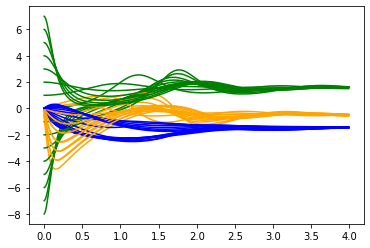

In [29]:
import matplotlib.pyplot as plt

u = 2
sigma_p = 1
sigma_u = 1

num_lines = 16
#v_p = 3
#phi_ar = [v_p for i in range(num_lines)]
phi_ar = [i - int(num_lines / 2) for i in range(num_lines)]
epsilon_u_ar = [0 for i in range(num_lines)]
epsilon_p_ar = [0 for i in range(num_lines)]
print(f"epsilon_p_ar {epsilon_p_ar}")
print(f"epsilon_u_ar {epsilon_u_ar}")
print(f"phi_ar {phi_ar}")
print()

t_max = 4
dt = 0.01

def g(phi): return phi * phi
def g_prime(phi): return 2 * phi

t = [i*dt for i in range(int(t_max/dt))]

# phi_res indexed by [line_num][step_num]
phi_res, epsilon_p_res, epsilon_u_res = [], [], []

for i in range(num_lines):
    phi_res.append([])
    epsilon_p_res.append([])
    epsilon_u_res.append([])

    for j in range(int(t_max/dt)):
        phi_ar[i] = phi_ar[i] + dt * (epsilon_u_ar[i] * g_prime(phi_ar[i]) - epsilon_p_ar[i])
        epsilon_p_ar[i] = epsilon_p_ar[i] + dt * (phi_ar[i] - v_p - sigma_p * epsilon_p_ar[i])
        epsilon_u_ar[i] = epsilon_u_ar[i] + dt * (u - g(phi_ar[i]) - sigma_u * epsilon_u_ar[i])

        # Accumulate results
        phi_res[i].append(phi_ar[i])
        epsilon_p_res[i].append(epsilon_p_ar[i])
        epsilon_u_res[i].append(epsilon_u_ar[i])

for k in range(num_lines):
    plt.plot(t, phi_res[k],c="green")
    plt.plot(t, epsilon_p_res[k],c="blue")
    plt.plot(t, epsilon_u_res[k],c="orange")